brew install graphviz  # had to upgrade graphviz on el capitan

pip install graphviz
pip install pygraphviz #I failed to get this installed

 so I tried this:
 
pip install pydot

hmm...looks like just pip install graphviz.

In [1]:
from lolviz import *

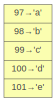

In [2]:
d = dict([(c,chr(c)) for c in range(ord('a'),ord('f'))])
dictviz(d)

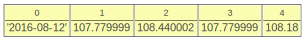

In [3]:
listviz(['2016-08-12',107.779999,108.440002,107.779999,108.18])

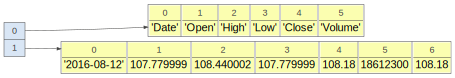

In [4]:
table = [
    ['Date','Open','High','Low','Close','Volume'],
    ['2016-08-12',107.779999,108.440002,107.779999,108.18,18612300,108.18],
]
lolviz(table)

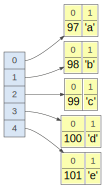

In [5]:
tuplelist = d.items()
lolviz(tuplelist)

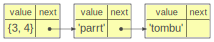

In [8]:
# test linked list node
class Node:
    def __str__(self):
        return "(%s,%s)" % (self.value, str(self.next))

    def __repr__(self):
        return str(self)

    def __init__(self, value, next=None):
        self.value = value
        self.next = next

head = Node('tombu')
head = Node('parrt', head)
head = Node({3,4}, head)
g = llistviz(head)
# or
g = llistviz(head, valuefield='value', nextfield='next')
# or
llistviz(head, value=lambda p:p.value, next=lambda p:p.next)

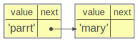

In [10]:
head2 = ('parrt',('mary',None))
llistviz(head2, value=lambda p:p[0], next=lambda p:p[1])